## Machine Learning and Statistics Project 2020
***


The aim of this project is to create a web service that uses machine learning to make predictions based on the data set 'powerproduction'. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. Then, to develop a web service that will respond with predicted power values based on speed values sent as HTTP requests.

<br>



<br>

## Introduction

***

There are a number of steps involved in creating a model that predicts wind turbine power as accurately as possible. This project follows these steps, providing explanations for the choice of model used through analysis of the data in the *powerproduction* data set. With this in mind, it is divided into the following sections:
    
    * Data Preparation
    * Function Approximation (Regression vs Classification)
    * Linear Regression with `scikit-learn`
    * Regression with `keras`
    * Model evaluation

<br>



## 1. Data Preparation

***

First, I import the modules needed and choose a style for visualisation throughout the project:

In [96]:
# 
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.model_selection import train_test_split

import tensorflow.keras as kr

In [103]:
# Plot style
plt.style.use('fivethirtyeight')

# Plot size
plt.rcParams['figure.figsize'] = [11, 6]

Next, I read in the dataset using `pandas.read_csv` which stores the data in a pandas dataframe. I assign this to `pp` and output the first 10 rows. With `pandas.describe` we get a statistical summary of the data set:

In [104]:
# Read in data set
pp = pd.read_csv('powerproduction.csv')

# Output first 10 rows
pp.head(10)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [105]:
# Output summary statistics of data set
pp.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


The data set contains two continuous variables. To get an overview of the relationship between them, we can plot them using a scatterplot. Visualising this relationship is a useful first step in understanding what predictive model might be suitable: 

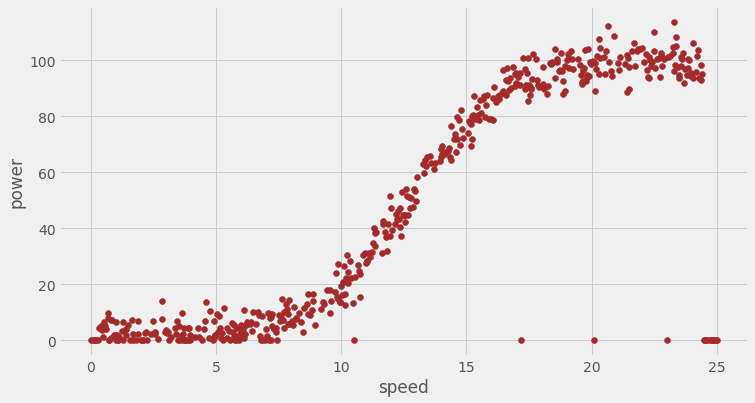

In [115]:
# Plot data on a scatter plot
plt.xlabel('speed')
plt.ylabel('power')
plt.scatter(pp['speed'], pp['power'], color='brown', marker='o')

## Regression vs Classification

***

As noted above, this project involves developing a model based on historical data (from the *powerproduction* data set) to make turbine output *power* predictions based on new data (*speed* values input by the user of a web service).  

## Regression
***

Taking a look at the data as plotted on a scatterplot (below), my inclination would be to apply regression as a model. Given that the dataset contains only two variables, simple linear regression may be an option.  

<br>



Firstly, I import the necessary Python packages. `Numpy` to perform numeric calculations, `Pandas` for data manipulation and analysis, `Matplotlib.pyplot` for visualisation and `sklearn.model_selection` to train my model.


<br>


,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


<br>



Visualisation of the data gives us a useful preliminary indication as to what model to choose and train in order to predict values for the dependent variable. Below, I plot the data on a scatterplot. 



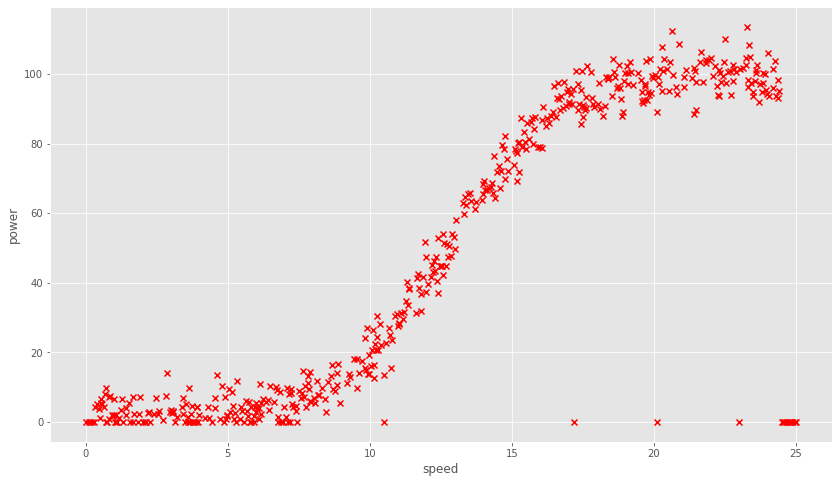

<br>



### Regression
Regression is a statistical method which describes the relationship between a dependent variable and one or more independent variables [1]. Additionally, it is associated with fitting a line (or curve) to the data by plotting the line over the data points to get the best fit [2]. With these two considerations in mind, regression appears to be an appropriate approach to take. Firstly, the aim of the current project is to predict wind turbine power output (*dependent variable*) based on speed values (*independent variable*). Second, taking a look data as plotted on a scatter plot, it is clear that we could fit a line (or curve) in order to accurately predict the dependent variable.

[1] Wikipedia; Regression analysis; https://en.wikipedia.org/wiki/Regression_analysis <br>
[2] yale.edu; Linear Regression; http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm <br>

I use a simple linear regression function imported from Python's Scikit-learn library to produce a model. Simple linear regression can be applied when the data set contains only two variables - a dependent and independent variable. This is a condition which is filled by the 'powerproduction' data set.

<br>

First, the data set is split into two separate columns in order to train the model.

In [6]:
# Create a new dataset containing only values from the speed column and print output
speed_df = pp.drop('power',axis='columns')
speed_df

,speed
0,0.000
1,0.125
2,0.150
3,0.225
4,0.275
...,...
495,24.775
496,24.850
497,24.875
498,24.950


In [7]:
# Create a new dataset containing only values from the power column and print output 
power_df = pp.drop('speed',axis='columns')
power_df

,power
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
495,0.0
496,0.0
497,0.0
498,0.0


<br>

Next, I create an instance of the LinearRegression() class and call the `fit` method, passing the speed and power dataframes as arguments. 

In [8]:
# Create an instance of the LinearRegression() class
reg = LinearRegression()

# Fit our data to the model
reg.fit(speed_df, power_df)

LinearRegression()

Once this is done, we can now test the model for accuracy. We can do this by calling a number of methods provided by the functionality of the `LinearRegresssion()` class.

<br>

First, I take a pick a value for speed and pass it to the `.predict` method

In [9]:
# Predict method using a value for speed
email = 10.89
arr = reg.predict([[9.746]])

<br>

Next, I call the `intercept_` method to determine where the line intercepts the y-axis. And below that I use call `coef_` to get the slope of the line. This gives us all the values for formula for the best-fitting line: $$y = mx + b$$ where m is the slope, b is the y-interept and x is the independent variable [3].

[3] dummies.com; How to calculate a regression line; https://www.dummies.com/education/math/statistics/how-to-calculate-a-regression-line/ <br>

In [10]:
# Call the intercept_ method to determine where the line intercepts the y-axis
reg.intercept_

array([-13.89990263])

In [11]:
# Call the coef_ method to calculate the slope of the line
reg.coef_

array([[4.91759567]])

In [12]:
# Set calculated values
m = 4.91759567
x = 9.746
b = -13.899902630519641

y = m*x + b
print(y)

34.02698476930036


As expected, we get the same result for y when we input these values into the formula (above)
<br>



### R-squared 

The `LinearRegression` class also provides functionality for calculating the the R-squared value. The R-squared value is a 'goodness-of-fit' measure which can give us an indication as to the accuracy of our regression model. The best possible score is 1.0, while a score of 0 or a negative value generally represents a worse-fitting line. The R-squared value "indicates the percentage of the variance in the dependent variable that the independent variables explain collectively." [4] It is worth noting that a high R-squared does not necessarily always indicate the best fit [5].

[4] Frost, J; How To Interpret R-squared in Regression Analysis; https://statisticsbyjim.com/regression/interpret-r-squared-regression/ <br>
[5] *Ibid*

In [13]:
# Calculate R-squared value
reg.score(speed_df, power_df)

0.7289360258564072

<br>


***

### Train_test_split

The train-test-split procedure involves training a machine learning algorithm by splitting the data into separate proportions. One proportion (train) is used to train the model while the other (test) is held back in order to test its accuracy. (It is worth pointing out that it may not always be appropriate as a technique to increase accuracy of prediction e.g. if the data set is too small [6].) 

<br>

Below, I pass the speed_df and power_df dataframes to the `train_test_split` method and set the parameter *test_size* to 0.2. The test size indicates the size of the train and test sets. Common split percentages include 
* Train: 80%, Test: 20%
* Train: 67%, Test: 33%
* Train: 50%, Test: 50% [7]


[6] machinelearningmastery.com; Train-Test Split for Evaluating Machine Learning Algorithms; https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/ <br>
[7] *Ibid*

In [14]:
# Call train_test_split method on dataframes
A_Train, A_Test, B_Train, B_Test = train_test_split(speed_df, power_df, test_size = 0.2)

In [15]:
pp = pp[pp.power != 0]


In [93]:
x = pp['speed']
y = pp['power']

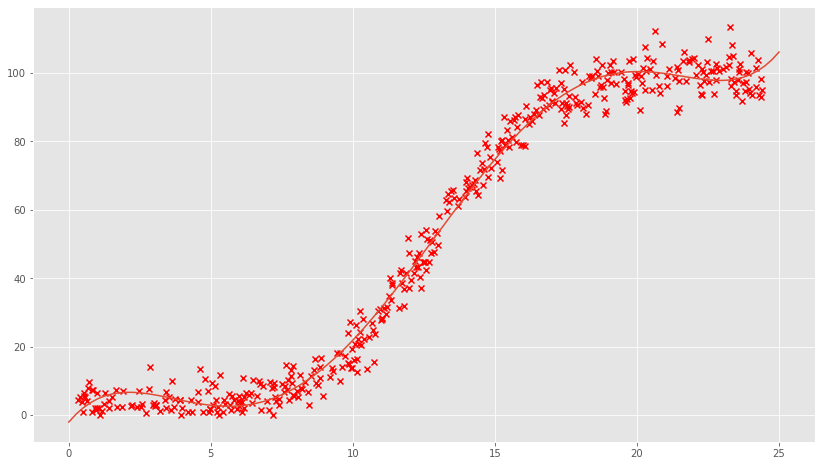

In [95]:
mymodel = np.poly1d(np.polyfit(x, y, 6))

myline = np.linspace(0, 25, 100)

plt.scatter(x, y, color='red', marker='x')
plt.plot(myline, mymodel(myline))
plt.show()


## Neural network - Regression

***

In [18]:
pp = pp[pp.power != 0]
pp.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


In [19]:
# Create neural network with one neuron
def create_model():
    model = kr.models.Sequential()
    model.add(kr.Input(shape=(1,)))
    model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.add(kr.layers.Dense(100, activation='relu', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.add(kr.layers.Dense(1, activation='linear', kernel_initializer='glorot_uniform', bias_initializer='glorot_uniform'))
    model.compile(kr.optimizers.Adam(lr=0.001), loss='mean_squared_error')
    
    return model

In [20]:
model = create_model()

In [21]:


msk = np.random.rand(len(pp)) < 0.5
train = pp[msk]

test = pp[~msk]

In [22]:
model.fit(train['speed'], train['power'], epochs=500, batch_size=10)

Epoch 1/500
22/22 [==============================] - 2s 3ms/step - loss: 4101.1521
Epoch 2/500
22/22 [==============================] - 0s 4ms/step - loss: 2981.2362
Epoch 3/500
22/22 [==============================] - 0s 4ms/step - loss: 1329.8109
Epoch 4/500
22/22 [==============================] - 0s 4ms/step - loss: 361.6352
Epoch 5/500
22/22 [==============================] - 0s 3ms/step - loss: 272.9729
Epoch 6/500
22/22 [==============================] - 0s 4ms/step - loss: 289.5567
Epoch 7/500
22/22 [==============================] - 0s 4ms/step - loss: 264.1746
Epoch 8/500
22/22 [==============================] - 0s 4ms/step - loss: 262.2270
Epoch 9/500
22/22 [==============================] - 0s 3ms/step - loss: 268.1937
Epoch 10/500
22/22 [==============================] - 0s 4ms/step - loss: 302.0560
Epoch 11/500
22/22 [==============================] - 0s 4ms/step - loss: 243.8153
Epoch 12/500
22/22 [==============================] - 0s 4ms/step - loss: 261.4471
Epoch 13/5

22/22 [==============================] - 0s 3ms/step - loss: 86.6811
Epoch 100/500
22/22 [==============================] - 0s 2ms/step - loss: 81.0730
Epoch 101/500
22/22 [==============================] - 0s 3ms/step - loss: 89.4992
Epoch 102/500
22/22 [==============================] - 0s 3ms/step - loss: 77.3717
Epoch 103/500
22/22 [==============================] - 0s 4ms/step - loss: 84.9669
Epoch 104/500
22/22 [==============================] - 0s 3ms/step - loss: 72.4290
Epoch 105/500
22/22 [==============================] - 0s 4ms/step - loss: 76.9367
Epoch 106/500
22/22 [==============================] - 0s 3ms/step - loss: 80.3204
Epoch 107/500
22/22 [==============================] - 0s 3ms/step - loss: 83.3405
Epoch 108/500
22/22 [==============================] - 0s 3ms/step - loss: 87.2861
Epoch 109/500
22/22 [==============================] - 0s 3ms/step - loss: 73.5655
Epoch 110/500
22/22 [==============================] - 0s 3ms/step - loss: 80.6395
Epoch 111/500
22/2

22/22 [==============================] - 0s 3ms/step - loss: 41.5155
Epoch 198/500
22/22 [==============================] - 0s 4ms/step - loss: 39.6761
Epoch 199/500
22/22 [==============================] - 0s 3ms/step - loss: 47.8147
Epoch 200/500
22/22 [==============================] - 0s 3ms/step - loss: 39.9859
Epoch 201/500
22/22 [==============================] - 0s 3ms/step - loss: 46.6931
Epoch 202/500
22/22 [==============================] - 0s 4ms/step - loss: 45.3960
Epoch 203/500
22/22 [==============================] - 0s 3ms/step - loss: 34.5213
Epoch 204/500
22/22 [==============================] - 0s 3ms/step - loss: 49.2346
Epoch 205/500
22/22 [==============================] - 0s 2ms/step - loss: 37.0398
Epoch 206/500
22/22 [==============================] - 0s 2ms/step - loss: 37.3000
Epoch 207/500
22/22 [==============================] - 0s 4ms/step - loss: 45.1806
Epoch 208/500
22/22 [==============================] - 0s 3ms/step - loss: 37.0047
Epoch 209/500
22/2

22/22 [==============================] - 0s 5ms/step - loss: 19.7591
Epoch 296/500
22/22 [==============================] - 0s 4ms/step - loss: 20.7028
Epoch 297/500
22/22 [==============================] - 0s 5ms/step - loss: 19.3776
Epoch 298/500
22/22 [==============================] - 0s 5ms/step - loss: 20.0991
Epoch 299/500
22/22 [==============================] - 0s 5ms/step - loss: 20.1133
Epoch 300/500
22/22 [==============================] - 0s 5ms/step - loss: 17.1629
Epoch 301/500
22/22 [==============================] - 0s 5ms/step - loss: 20.0628
Epoch 302/500
22/22 [==============================] - 0s 5ms/step - loss: 19.4830
Epoch 303/500
22/22 [==============================] - 0s 5ms/step - loss: 17.2282
Epoch 304/500
22/22 [==============================] - 0s 5ms/step - loss: 18.8990
Epoch 305/500
22/22 [==============================] - 0s 4ms/step - loss: 24.0001
Epoch 306/500
22/22 [==============================] - 0s 4ms/step - loss: 15.8807
Epoch 307/500
22/2

22/22 [==============================] - 0s 3ms/step - loss: 16.5246
Epoch 394/500
22/22 [==============================] - 0s 3ms/step - loss: 15.0584
Epoch 395/500
22/22 [==============================] - 0s 3ms/step - loss: 20.4380
Epoch 396/500
22/22 [==============================] - 0s 4ms/step - loss: 15.9683
Epoch 397/500
22/22 [==============================] - 0s 3ms/step - loss: 14.4132
Epoch 398/500
22/22 [==============================] - 0s 3ms/step - loss: 18.5226
Epoch 399/500
22/22 [==============================] - 0s 3ms/step - loss: 18.7425
Epoch 400/500
22/22 [==============================] - 0s 3ms/step - loss: 15.6279
Epoch 401/500
22/22 [==============================] - 0s 3ms/step - loss: 15.9564
Epoch 402/500
22/22 [==============================] - 0s 3ms/step - loss: 16.3833
Epoch 403/500
22/22 [==============================] - 0s 3ms/step - loss: 20.2873
Epoch 404/500
22/22 [==============================] - 0s 4ms/step - loss: 22.9701
Epoch 405/500
22/2

22/22 [==============================] - 0s 3ms/step - loss: 16.8065
Epoch 492/500
22/22 [==============================] - 0s 3ms/step - loss: 18.0722
Epoch 493/500
22/22 [==============================] - 0s 3ms/step - loss: 16.5634
Epoch 494/500
22/22 [==============================] - 0s 3ms/step - loss: 16.2985
Epoch 495/500
22/22 [==============================] - 0s 3ms/step - loss: 15.6167
Epoch 496/500
22/22 [==============================] - 0s 3ms/step - loss: 16.2495
Epoch 497/500
22/22 [==============================] - 0s 3ms/step - loss: 19.1457
Epoch 498/500
22/22 [==============================] - 0s 3ms/step - loss: 16.0299
Epoch 499/500
22/22 [==============================] - 0s 3ms/step - loss: 17.3746
Epoch 500/500
22/22 [==============================] - 0s 3ms/step - loss: 19.2283


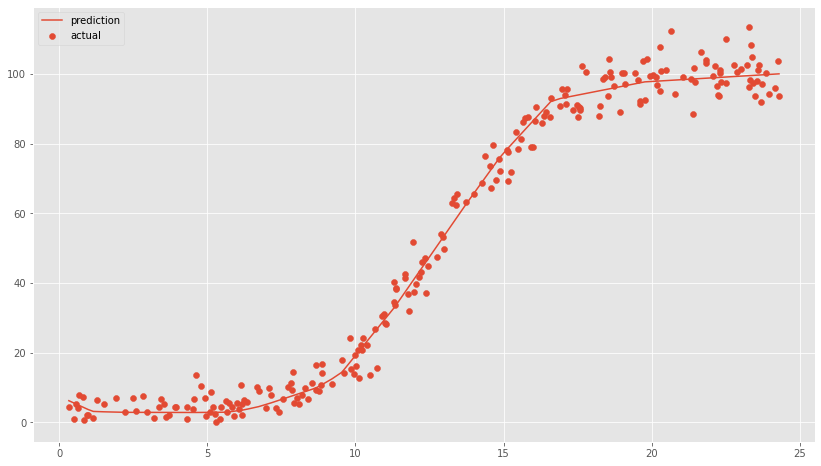

In [23]:
plt.scatter(test['speed'], test['power'], label='actual')
plt.plot(test['speed'], model.predict(test['speed']), label='prediction')
plt.legend()

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               200       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 10,401
Trainable params: 10,401
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.save('my_model.h5')

In [26]:
model.predict([14])

array([[65.76017]], dtype=float32)

In [88]:
lin_x = pp.speed[:, np.newaxis]
lin_y = pp.power[:, np.newaxis]

<ipython-input-88-5eafad447be6>:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lin_x = pp.speed[:, np.newaxis]
<ipython-input-88-5eafad447be6>:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lin_y = pp.power[:, np.newaxis]


In [89]:
polynomial_features= PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(lin_x)

In [90]:
lin_model = LinearRegression()
lin_model.fit(x_poly, lin_y)
y_poly_pred = lin_model.predict(x_poly)

In [91]:

rmse = np.sqrt(mean_squared_error(lin_y,y_poly_pred))
r2 = r2_score(lin_y,y_poly_pred)
print(rmse)
print(r2)

4.438058874744193
0.9879782627661895


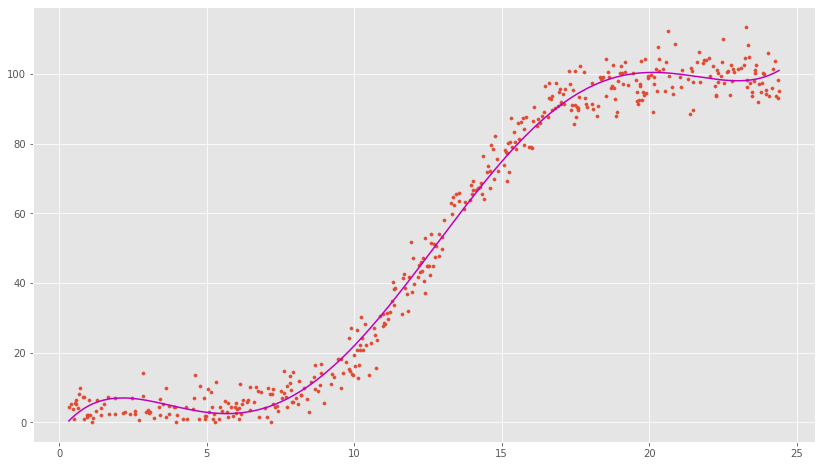

In [92]:

plt.scatter(lin_x, lin_y, s=10)
# sort the values of x before line plot
# sort_axis = operator.itemgetter(0)
# sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
# x, y_poly_pred = zip(*sorted_zip)
plt.plot(lin_x, y_poly_pred, color='m')
plt.show()

In [ ]:
np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)